#W9 HOMEWORK

##Q1) Which of these is a classification problem?
``` Provided below are 4 example applications of machine learning. Which of them is a supervised classification problem?```

* A) Using labeled financial data to predict whether the value of a stock will go up or go down next week.
* B) Using labeled housing price data to predict the price of a new house based on various features.
* C) Using unlabeled data to cluster the students of an online education company into different categories based on their learning styles.
* D) Using labeled financial data to predict what the value of a stock will be next week.




In [ ]:
answer_q1 = "A" #@param ["A", "B", "C", "D"]

---

##Q2) 

>You'll be working with a dataset obtained from the sklearn datasets. 
* Load `breast_cancer` dataset.

>Firs of all, you need to perform Exploratory data analysis (EDA) in order to understand the structure of the data.

>Load the data into a DataFrame called df. Use pandas' ```.head(), .info(), and .describe()``` methods in the colab code block to explore the DataFrame, and fill the statement below.


* A) The DataFrame has a total of ___ rows and __ columns.
* B) columns are of type ___
* C) The features of these dataset are ____
* D) There are __ predictor variables, or features, in this DataFrame.
* E) The target variable in this DataFrame is '____'.
* F) Which classes data include as target ?
---



In [1]:
from sklearn import datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
breast = datasets.load_breast_cancer()

In [3]:
breast.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
X = breast.data
y =  breast.target

In [12]:
breast.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

##Q3 load the data to dataframe and see first 5 rows and plot the dataframe with features and sets color with their target class.

In [13]:
df = pd.DataFrame(X, columns=breast.feature_names)

In [14]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##Q4 k-Nearest Neighbors: Fit
Having explored the **breast cancer** dataset, it is time now to build your first classifier. In this exercise, you will fit a k-Nearest Neighbors classifier to the breast dataset, which you has been pre-loaded for you into a DataFrame ```df```.

* Import `KNeighborsClassifier` from sklearn.neighbors.
* Create arrays `X` and `y` for the features and the target variable. 

* Split the data to X_train X_test y_train and y_test

* Instantiate a `KNeighborsClassifier` called `knn` with `6` neighbors by specifying the `n_neighbors` parameter.

* Fit the classifier to the data using the `.fit()` method.

In [16]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn import metrics

# Create arrays for the features and the response variable
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

# Fit the classifier to the data
y_pred = knn.predict(X_test)


#Q4 What is the model's accuracy and which k value the best for this classifier ?

In [17]:
knn.score(X_test, y_test)

0.9239766081871345

In [18]:
predict_names = list()
for x in y_pred:
  predict_names.append(breast.target_names[x])

print(predict_names)

['benign', 'malignant', 'benign', 'malignant', 'malignant', 'malignant', 'malignant', 'malignant', 'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant', 'benign', 'benign', 'malignant', 'benign', 'malignant', 'malignant', 'benign', 'benign', 'malignant', 'benign', 'benign', 'malignant', 'malignant', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'malignant', 'malignant', 'benign', 'benign', 'benign', 'malignant', 'malignant', 'benign', 'malignant', 'benign', 'benign', 'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant', 'benign', 'malignant', 'malignant', 'benign', 'benign', 'benign', 'malignant', 'malignant', 'benign', 'benign', 'malignant', 'malignant', 'benign', 'benign', 'malignant', 'benign', 'benign', 'benign', 'benign', 'malignant', 'malignant', 'malignant', 'benign', 'malignant', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'malignant', 'benign', 'benign', 'benign', 'benign', 'benign', 

In [19]:
#k must be greater than 1
k_range = range(2,8)
scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

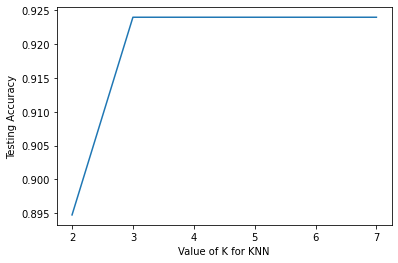

In [20]:
# plot the relationship between k and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')